In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv


--2024-05-03 09:26:41--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  19.9MB/s    in 0.3s    

2024-05-03 09:26:42 (19.9 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()

In [ ]:
"""
TO COMBINE COLUMNS
title, overview, production companies (name), genres(name), keywords(name), tagline, original language
"""
import json
# df.insert(0, "movie_genre", True)


def unpack_dict(df, col, key, new_col):
  df.insert(0, new_col, True)
  string=''
  k=0
  for row in df[col]:
    res = json.loads(row)
    for i in res:
      string += i[key].replace(' ','') + ' '
    df[new_col][k] = string
    string = ''
    k+=1

# df_document =
unpack_dict(df, 'genres', 'name', 'movie_genre')


In [ ]:
# df.insert(0, "movie_keywords", True)
unpack_dict(df, 'keywords', 'name', 'movie_keywords')
df.head()

In [ ]:
# df.insert(0, 'companies', True)

unpack_dict(df,'production_companies', 'name', 'companies')
df.head()

In [ ]:
# df.insert(0, 'countries', True)

unpack_dict(df,'production_countries', 'name', 'countries')
df.head()

In [ ]:
# df.insert(0, 'languages', True)

unpack_dict(df,'spoken_languages', 'name', 'languages')
df.head()

In [88]:
df.columns

Index(['countries', 'companies', 'movie_keywords', 'movie_genre', 'budget',
       'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
df_new = df.drop(['genres', 'keywords', 'budget', 'homepage', 'id', 'original_title', 'popularity', 'production_companies', 'production_countries', 'runtime', 'revenue', 'release_date', 'vote_average', 'vote_count', 'spoken_languages', 'original_language'], axis=1)
df_new.head()
df_new_X = df_new.drop(['title'], axis=1)
df_new_X.head()

In [ ]:
df_string = df_new_X
# df_string = df_string.drop(['movie_string'], axis=1)
df_string['movie_string'] = df_new_X[df_new_X.columns[:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)


In [126]:
df_string['movie_string'].head()

0    English Español  UnitedStatesofAmerica UnitedK...
1    English  UnitedStatesofAmerica  WaltDisneyPict...
2    Français English Español Italiano Deutsch  Uni...
3    English  UnitedStatesofAmerica  LegendaryPictu...
4    English  UnitedStatesofAmerica  WaltDisneyPict...
Name: movie_string, dtype: object

In [127]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df_string['movie_string'])


In [ ]:
movie2idx = pd.Series(df_new.index, index=df_new['title'])
movie2idx


In [177]:
# choose a movie from db
idx = np.random.choice(movie2idx)
# idx = movie2idx['Scream 3']
idx
movie_query_tfidf = X[idx]
movie_query_tfidf.toarray()


array([[0., 0., 0., ..., 0., 0., 0.]])

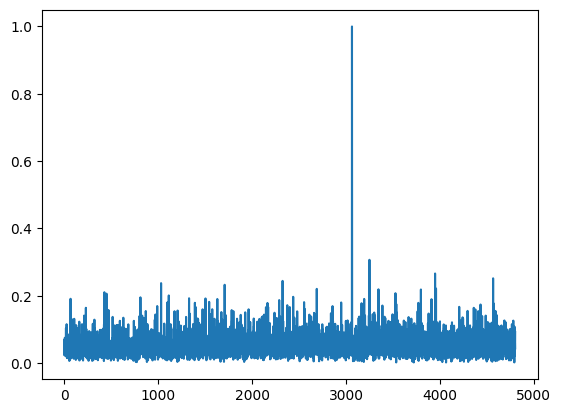

In [178]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

scores = cosine_similarity(movie_query_tfidf, X)
scores = scores.flatten()

plt.plot(scores)
plt.show()

In [179]:
top_five = (-scores).argsort()[1:6]
top_five

array([3250, 3949, 4567, 2325, 1031])

In [181]:
print(f"Movies similar to '{df_new['title'].iloc[idx]}' are: \n")
print(df_new['title'].iloc[top_five])

Movies similar to 'Run, Fatboy, Run' are: 

3250            Much Ado About Nothing
3949                      Bachelorette
4567    Conversations with Other Women
2325        My Big Fat Greek Wedding 2
1031          My Best Friend's Wedding
Name: title, dtype: object
